### Khai báo các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pandas as pd
import itertools
import ast
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from utils import *
from sklearn.metrics import confusion_matrix

### Đọc vào dữ liệu

In [2]:
data_ner = pd.read_excel(r"dataset/data_LSTM.xlsx")
data_ner.dropna()

,Word,NER
0,Đó là con đường biển ngắn nhất để đi từ Ấn_Độ_...,"['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
1,Một chuyến hải_trình xuyên ba nước Malaysia Si...,"['O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'B-LOC..."
2,Từ bức điện của IMB,"['O', 'O', 'O', 'O', 'B-ORG']"
3,Chúng_tôi lên_đường ngay khi nhận được email c...,"['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
4,Ông còn nhấn_mạnh trong thư_điện_tử Phải hết_s...,"['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
...,...,...
2044,Theo cơ_quan điều_tra vụ_việc sẽ không bị chìm...,"['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2045,Vì_sao,['O']
2046,Lãnh_đạo Cơ_quan cảnh_sát điều_tra trả_lời vì ...,"['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', ..."
2047,Bộ_trưởng ra toà làm nhân_chứng,"['O', 'O', 'O', 'O', 'O']"


### In ra kích thước của dữ liệu

In [3]:
print("Số lượng văn bản: ", data_ner.shape[0])

Số lượng văn bản:  2049


### Thông tin cơ bản về dữ liệu

In [4]:
data_ner.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049 entries, 0 to 2048
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Word    2049 non-null   object
 1   NER     2049 non-null   object
dtypes: object(2)
memory usage: 32.1+ KB


In [5]:
data_ner['NER'] = data_ner['NER'].apply(ast.literal_eval)

### Thống kê số lượng của mỗi nhãn thực thể

In [6]:
all_values = list(itertools.chain.from_iterable(data_ner['NER']))

In [7]:
np.array(all_values)

array(['O', 'O', 'O', ..., 'I-PER', 'O', 'O'], dtype='<U6')

In [8]:
pd.value_counts(all_values)

O         36619
B-PER       979
B-LOC       720
I-PER       508
I-LOC       374
I-ORG       288
B-ORG       191
I-MISC       28
B-MISC       27
Name: count, dtype: int64

### Mã hóa cột Word

In [9]:
unique_words, word_to_id = process_corpus(data_ner['Word'])

In [10]:
X_pre = np.array([encode_text(sentence, word_to_id) for sentence in data_ner['Word']])

In [11]:
X_pre

array([[   1,    2,    3, ...,    0,    0,    0],
       [  33,   34,   22, ...,    0,    0,    0],
       [  10,   61,   62, ...,    0,    0,    0],
       ...,
       [1310,   74,  273, ...,    0,    0,    0],
       [5055,  171, 3482, ...,    0,    0,    0],
       [ 239, 5055,  708, ...,    0,    0,    0]])

##### Ví dụ văn bản thứ 3 trước khi chưa mã hóa

In [12]:
data_ner['Word'][2]

'Từ bức điện của IMB'

##### Văn bản thứ 3 sau khi được mã hóa

In [13]:
X_pre[2]

array([10, 61, 62, 20, 63,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

### Mã hóa cột NER

In [15]:
tags2id = {}
for i, tag in enumerate(pd.unique(all_values)):
    tags2id[tag] = i

In [16]:
tags2id

{'O': 0,
 'B-LOC': 1,
 'B-ORG': 2,
 'I-LOC': 3,
 'B-PER': 4,
 'I-PER': 5,
 'I-ORG': 6,
 'B-MISC': 7,
 'I-MISC': 8}

In [17]:
id2tags = {value: key for key, value in tags2id.items()}

In [18]:
id2tags

{0: 'O',
 1: 'B-LOC',
 2: 'B-ORG',
 3: 'I-LOC',
 4: 'B-PER',
 5: 'I-PER',
 6: 'I-ORG',
 7: 'B-MISC',
 8: 'I-MISC'}

In [19]:
Y_pre = preprocess_tags(tags2id, data_ner['NER'])

In [20]:
np.array(Y_pre)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0]])

##### Ví dụ list thứ 3 trước khi chưa mã hóa

In [21]:
np.array(data_ner['NER'][3])

array(['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-PER', 'I-PER', 'O',
       'O', 'O', 'B-ORG', 'I-ORG', 'I-ORG', 'B-ORG', 'O', 'B-LOC', 'O',
       'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'I-LOC'],
      dtype='<U5')

##### List thứ 3 sau khi mã hóa

In [22]:
np.array(Y_pre[3])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 5, 0, 0, 0, 2, 6, 6, 2, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Chia dữ liệu thành 3 tập Train : Validation : Test theo tỷ lệ 70 : 10 : 20

In [23]:
len_ = data_ner.shape[0]
X_train = X_pre[:int(len_*0.7)]
X_val = X_pre[int(len_*0.7):int(len_*0.8)]
X_test = X_pre[int(len_*0.8):]
Y_train = Y_pre[:int(len_*0.7)]
Y_val = Y_pre[int(len_*0.7):int(len_*0.8)]
Y_test = Y_pre[int(len_*0.8):]

In [24]:
print("Số mẫu của data_Train: ", X_train.shape[0])
print("Số mẫu của data_Validation: ", X_val.shape[0])
print("Số mẫu của data_Test: ", X_test.shape[0])

Số mẫu của data_Train:  1434
Số mẫu của data_Validation:  205
Số mẫu của data_Test:  410


### Xây dựng mô hình BiLSTM

In [25]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, Y_val))

In [26]:
BATCH_SIZE = 28
train_dataset = train_dataset.batch(BATCH_SIZE)
val_dataset = val_dataset.batch(BATCH_SIZE)

In [27]:
embedding_dim = 200
maxlen = 150
max_words = 20000
num_tags = 9

model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(max_words, embedding_dim, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=100, activation='tanh', return_sequences=True)),
    tf.keras.layers.Dense(num_tags, activation='softmax')
])

c:\Users\84936\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [28]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam', metrics=['accuracy'])

In [29]:
history = model.fit(train_dataset,
                    validation_data=val_dataset,
                    epochs=20)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 290ms/step - accuracy: 0.9114 - loss: 0.3962 - val_accuracy: 0.9920 - val_loss: 0.0421
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 305ms/step - accuracy: 0.9890 - loss: 0.0554 - val_accuracy: 0.9920 - val_loss: 0.0396
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 312ms/step - accuracy: 0.9891 - loss: 0.0509 - val_accuracy: 0.9920 - val_loss: 0.0357
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 17s 322ms/step - accuracy: 0.9892 - loss: 0.0433 - val_accuracy: 0.9929 - val_loss: 0.0296
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 313ms/step - accuracy: 0.9902 - loss: 0.0319 - val_accuracy: 0.9940 - val_loss: 0.0254
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 307ms/step - accuracy: 0.9925 - loss: 0.0228 - val_accuracy: 0.9950 - val_loss: 0.0253
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 314ms/step - accuracy: 0.9940 - loss: 0.0177 - val_accuracy: 0.9953 - val_loss: 0.0249
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 309ms/step - accuracy: 0.9954 - loss: 0.0145 - val_accu

### Dự đoán và đánh giá mô hình

In [30]:
data_test = data_ner.iloc[int(len_*0.8):]

### Dự đoán cho 1 mẫu bất kỳ

In [31]:
pred_tag_list = make_prediction(data_test=data_test, word_to_id=word_to_id, model=model,
                                i = 4,
                                id2tag=id2tags)

##### Nhãn dự đoán

In [32]:
np.array(pred_tag_list)

array(['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'I-LOC', 'O', 'O', 'O',
       'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',
       'O', 'O'], dtype='<U5')

##### Nhãn thực tế

In [33]:
np.array(data_test['NER'].iloc[4])

array(['O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'I-LOC', 'O', 'O', 'O',
       'B-LOC', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O',
       'O', 'O'], dtype='<U5')

### Lấy ra tập dự đoán

In [34]:
pred_NER = []
for k in range (0, data_test.shape[0]):
    pred_tag_list = make_prediction(data_test=data_test, word_to_id=word_to_id, model=model, i = k, id2tag=id2tags)
    pred_NER.append(pred_tag_list)

In [35]:
pred_NER = pd.DataFrame({'pred_NER':pred_NER})

##### In ra 5 dòng đầu tiên của data dự đoán

In [36]:
pred_NER['pred_NER'].head()

0                             [O, O, O, O, O, O, O, O]
1        [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]
2                 [O, O, O, O, O, O, O, O, O, O, O, O]
3                          [O, O, O, O, O, O, O, O, O]
4    [O, O, O, O, O, O, O, B-LOC, I-LOC, O, O, O, B...
Name: pred_NER, dtype: object

##### In ra 5 dòng đầu tiên của data thực tế

In [37]:
data_test['NER'].head()

1639                             [O, O, O, O, O, O, O, O]
1640        [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O]
1641                 [O, O, O, O, O, O, O, O, O, O, O, O]
1642                          [O, O, O, O, O, O, O, O, O]
1643    [O, O, O, O, O, O, O, B-LOC, I-LOC, O, O, O, B...
Name: NER, dtype: object

### In ra các độ đo đánh giá mô hình

In [38]:
true_labels = [item for sublist in data_test['NER'].tolist() for item in sublist]
pred_labels = [item for sublist in pred_NER['pred_NER'].tolist() for item in sublist]

precision = precision_score(true_labels, pred_labels, average='weighted', zero_division=0)
recall = recall_score(true_labels, pred_labels, average='weighted', zero_division=0)
f1 = f1_score(true_labels, pred_labels, average='weighted', zero_division=0)
accuracy = accuracy_score(true_labels, pred_labels)

In [39]:
accuracy, precision, recall, f1

(0.9442298955020445,
 0.9349147127348298,
 0.9442298955020445,
 0.9347202252735277)

In [40]:
all_values = list(itertools.chain.from_iterable(data_test['NER']))
pd.value_counts(all_values)

O         8079
B-PER      166
B-LOC      144
I-ORG      130
I-PER      127
I-LOC       86
B-ORG       70
B-MISC       1
I-MISC       1
Name: count, dtype: int64

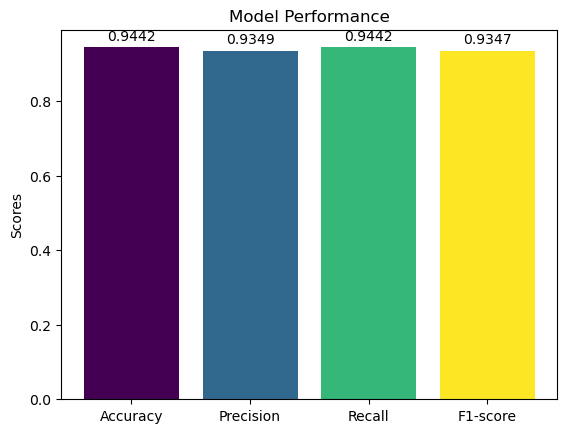

In [41]:
import matplotlib.pyplot as plt
import numpy as np

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']

model_scores = [accuracy, precision, recall, f1]

colors = plt.cm.viridis(np.linspace(0, 1, 4))

x = range(4)

fig, ax = plt.subplots()
bars = ax.bar(x, model_scores, color=colors)

ax.set_ylabel('Scores')
ax.set_title('Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(metrics)

def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars)

plt.show()

##### Dự đoán cho 1 mẫu bất kì

In [42]:
text1 = 'Đó là con đường biển ngắn nhất để đi từ Ấn_Độ_Dương sang Thái_Bình_Dương'
len_orginal_sententce = np.array(text1.split()).shape[0]
text = np.array(encode_text(text1, word_to_id))
prediction = model.predict(text.reshape((1, 150)))
prediction = np.argmax(prediction[0], axis=1)

prediction = list(prediction)[ : len_orginal_sententce] 

pred_tag_list = []
for tag_id in prediction:
    pred_tag_list.append(id2tags[tag_id])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


In [43]:
np.array(pred_tag_list)

array(['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-LOC', 'O',
       'B-LOC'], dtype='<U5')

In [44]:
for i in range (0, len_orginal_sententce):
    print(text1.split()[i], '   ------>   ', pred_tag_list[i])

Đó    ------>    O
là    ------>    O
con    ------>    O
đường    ------>    O
biển    ------>    O
ngắn    ------>    O
nhất    ------>    O
để    ------>    O
đi    ------>    O
từ    ------>    O
Ấn_Độ_Dương    ------>    B-LOC
sang    ------>    O
Thái_Bình_Dương    ------>    B-LOC
